# Классификация цен на мобильные устройства

**Цель этого проекта** - разделить мобильные телефоны на разные ценовые категории на основе различных характеристик, таких как заряд батареи, размеры экрана, объем оперативной памяти, скорость процессора и другие технические характеристики.

Целевая переменная price_range представляет мобильные ценовые категории, которые варьируются от низких до высоких, что создает задачу многоклассовой классификации.


# **1. Imports**

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
import sklearn
print(sklearn.__version__)

1.5.2


In [3]:
import sys
print(sys.version)

3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]


# **2. Данные**

**Контекст (Набор данных взят с [kaggle.com](https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification/data) )**

Боб основал собственную компанию мобильной связи. Он хочет дать серьезный отпор таким крупным компаниям, как Apple, Samsung и т.д.

Он не знает, как оценить стоимость мобильных телефонов, которые производит его компания. На этом конкурентном рынке мобильных телефонов нельзя просто предполагать что-то. Чтобы решить эту проблему, он собирает данные о продажах мобильных телефонов различных компаний.

Боб хочет выяснить некоторую взаимосвязь между характеристиками мобильного телефона (например, оперативной, встроенной памятью и т.д.) и его продажной ценой. Но он не очень хорош в машинном обучении. Поэтому ему нужна ваша помощь, чтобы решить эту проблему.

В этой задаче вам нужно предсказать не фактическую цену, а диапазон цен, указывающий, насколько высока цена

Выведем саму структуру набора данных (или по другому dataframe).

In [4]:
# Read the CSV file
df = pd.read_csv('train.csv')
df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

Также стоит отметить, что все признаки в наборе - числовые

In [5]:
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [6]:
df.shape

(2000, 21)

In [7]:
# Check for Duplication
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [8]:
# display some information about out data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Взглянув на значения столбцов, я могу отметить, что у нас есть px_width, px_height, которые указывают на высоту и ширину мобильного устройства в пикселях, и у нас есть sc_h, sc_w, которые указывают на высоту и ширину мобильного устройства в дюймах..

Нам нужно убедиться, что эти значения напрямую связаны??.

Я имею в виду, что если px_width, px_height - это разрешения в пикселях, а sc_w, sc_h - размеры экрана в дюймах, то они должны иметь математическую зависимость через соотношение PPI (пикселей на дюйм).

Мы могли бы проверить, связывает ли эти пары столбцов постоянный коэффициент, и если соотношения совпадают, это означает, что значения являются просто разными представлениями одной и той же информации.

In [9]:
df['px_ratio_width'] = df['px_width'] / df['sc_w']
df['px_ratio_height'] = df['px_height'] / df['sc_h']
print(df[['px_ratio_width', 'px_ratio_height']].describe())

       px_ratio_width  px_ratio_height
count     2000.000000      2000.000000
mean              inf        59.683055
std               NaN        49.394592
min         32.000000         0.000000
25%        133.714286        22.943860
50%        235.900000        47.750000
75%        600.083333        82.578571
max               inf       345.600000


Наличие значений inf и NaN в px_ratio_width указывает на наличие проблем, вероятно, связанных с делением на ноль или очень малыми числами в столбце sc_w. Эти значения не отображались бы, если бы соотношения были постоянными.

Из этих результатов следует, что параметры px_width, px_height, sc_w и sc_h не являются просто масштабированными версиями друг друга. Вероятно, они отражают различные аспекты характеристик телефона (например, плотность пикселей может значительно различаться на разных телефонах).


In [10]:
# Remove (px_ratio_height, px_ratio_width) columns from data
df.drop(['px_ratio_height','px_ratio_width'], axis = 1, inplace= True)

In [11]:
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', None)       # Display full rows

print(df.describe())

       battery_power       blue  clock_speed     dual_sim           fc       four_g   int_memory  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500     0.521500    32.046500   
std       439.418206     0.5001     0.816004     0.500035     4.341444     0.499662    18.145715   
min       501.000000     0.0000     0.500000     0.000000     0.000000     0.000000     2.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000     0.000000    16.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000     1.000000    32.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000     1.000000    48.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000     1.000000    64.000000   

             m_dep    mobile_wt      n_cores           pc    px_height     px_width          ram  \

По матрице корреляций понятно, что нет признаков, коррелирующий между собой, поэтому не будем ничего удалять на этом этапе.

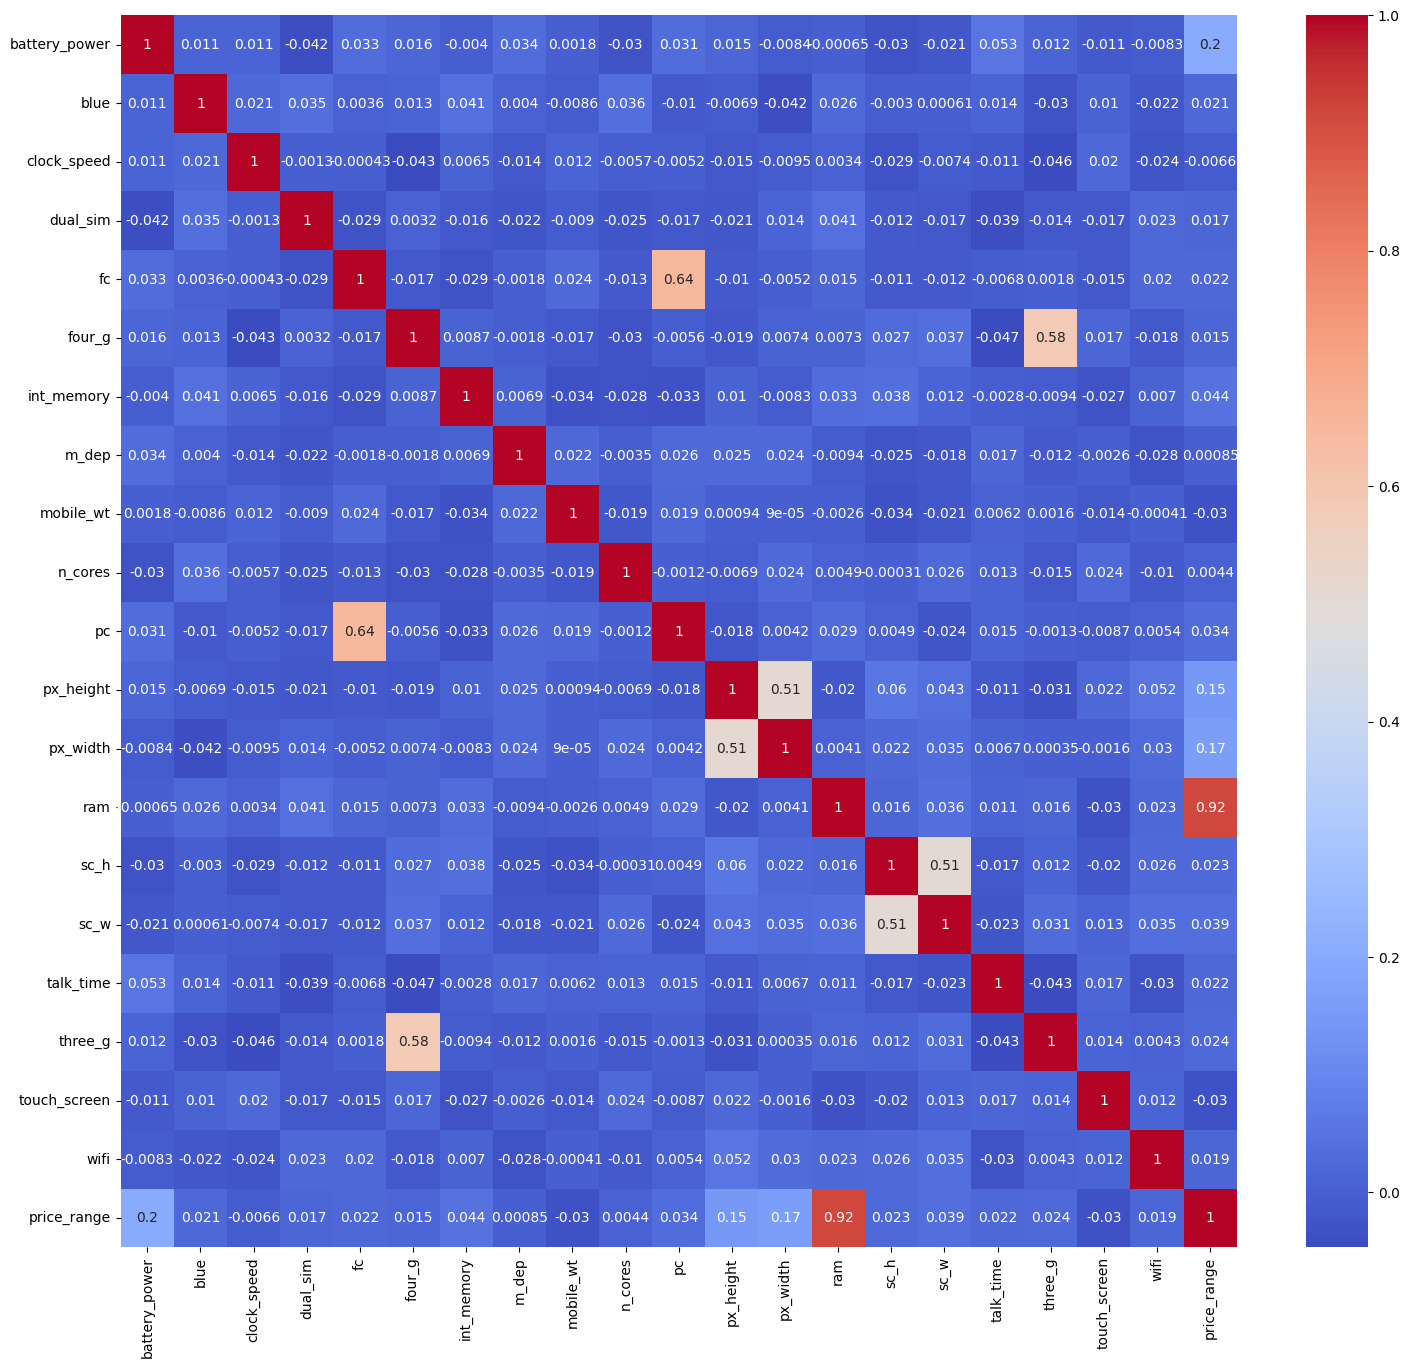

In [12]:
#Correlation Heatmap, this will help you understand relationships between numerical variables.
plt.figure(figsize=(18, 16))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()


Посмотрим, потенциальную важность признаков (насколько они коррелируют с целевой переменной). В топе оказались память, емкость батареи и разрешение экрана.

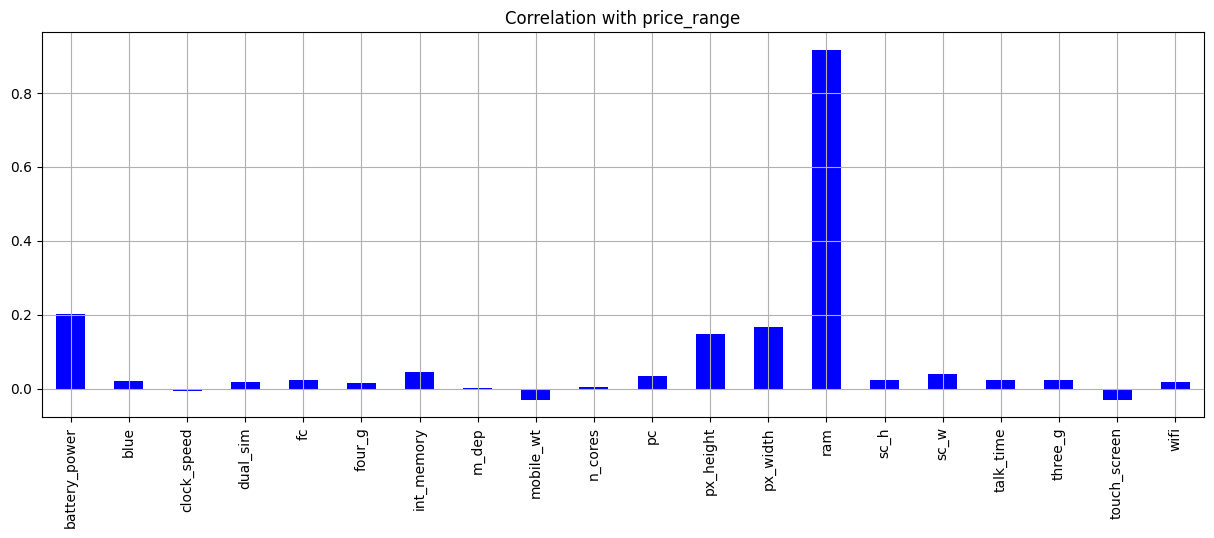

In [13]:
# Feature Importance Visualization
# Understand which features in the dataset are most important in determining the value of "price_range".
df.drop('price_range', axis=1).corrwith(df.price_range).plot(kind='bar', grid=True, figsize=(15, 5)
, title="Correlation with price_range",color="Blue");

Посмотрим на диапазон и распрделение значений каждого признака:

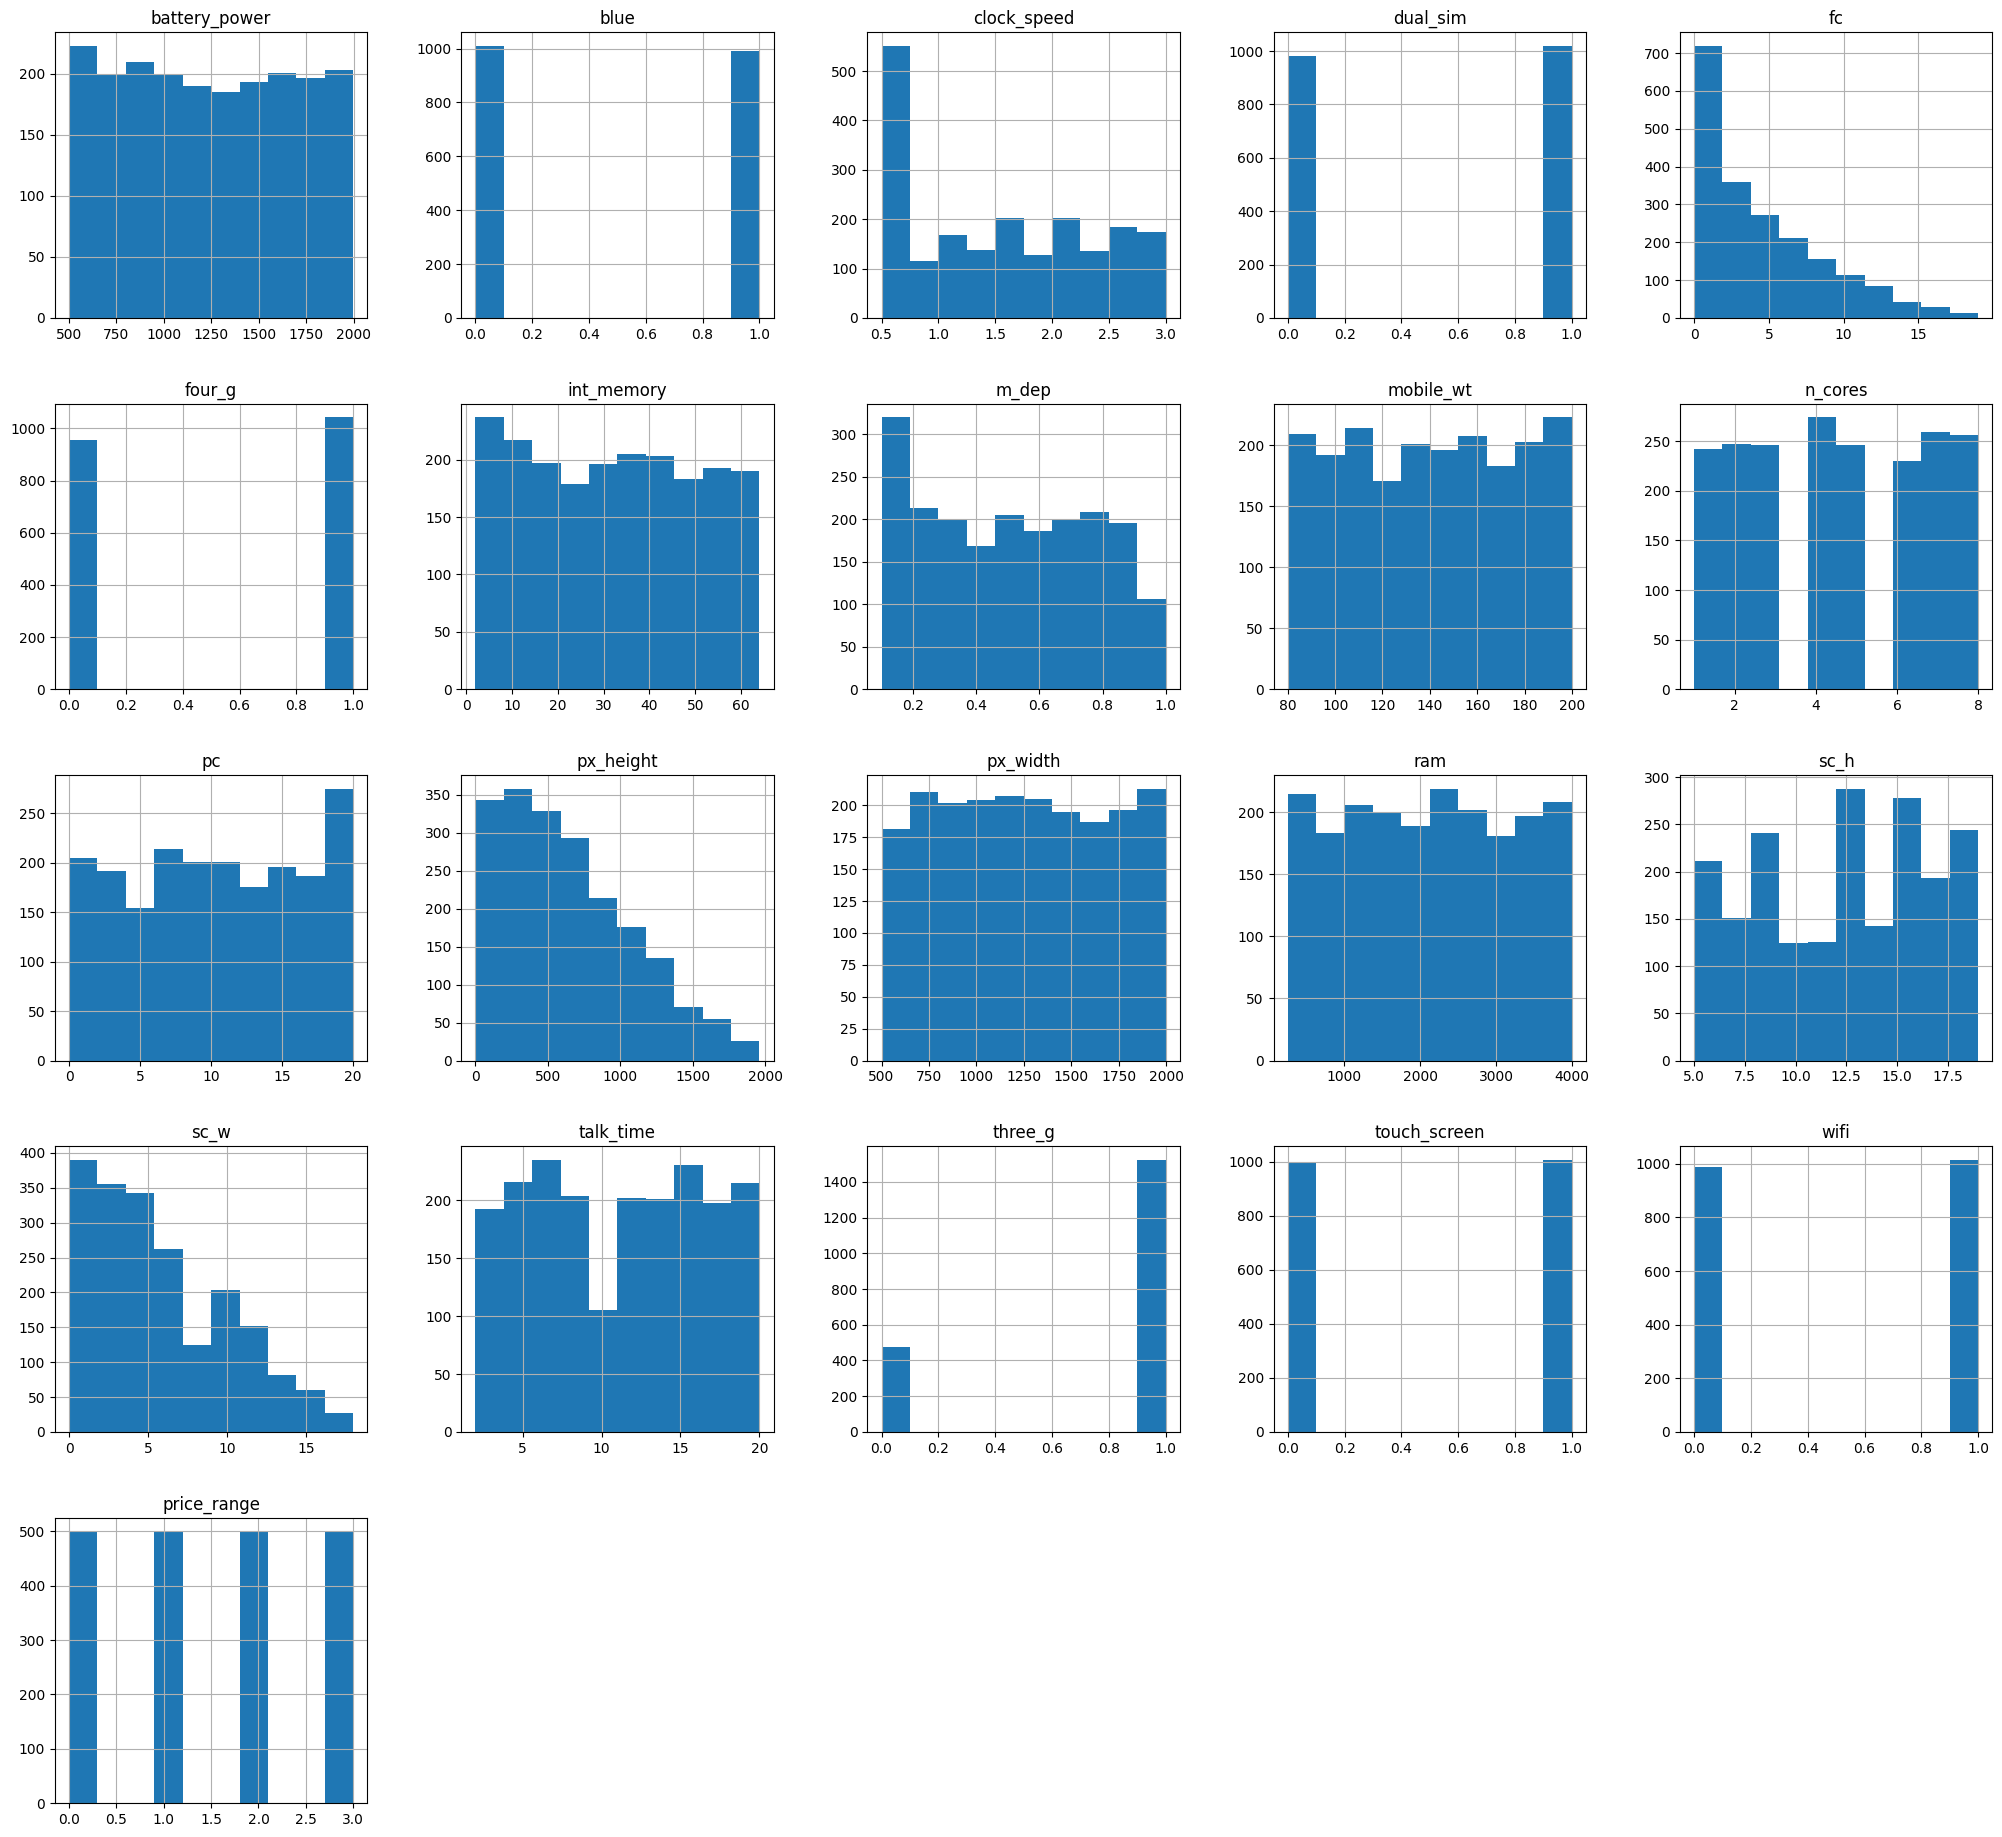

In [14]:
# Distribution of Features, Use histograms to check the distribution of numerical features.
df.hist(figsize=(25, 23))
plt.show()

Добавим на графики информацию о среднем, моде и медиане

In [15]:
def generate_distribution_plot(df_train, continuous_features):
    # create copy of dataframe
    data = df_train[continuous_features].copy()
    # Create subplots
    fig, axes = plt.subplots(nrows=len(data.columns)//2, ncols=2,figsize=(20, 40))
    fig.subplots_adjust(hspace=0.7)

    # set fontdict
    font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

    # Generate distplot
    for ax, feature in zip(axes.flatten(), data.columns):
        feature_mean = data[feature].mean()
        feature_median = data[feature].median()
        feature_mode = data[feature].mode().values[0]
        sns.distplot(data[feature],ax=ax)
        ax.set_title(f'Analysis of {feature}', fontdict=font)
        ax.axvline(feature_mean, color='r', linestyle='--', label="Mean")
        ax.axvline(feature_median, color='g', linestyle='-', label="Median")
        ax.axvline(feature_mode, color='b', linestyle='-', label="Mode")
        ax.legend()
    plt.show()

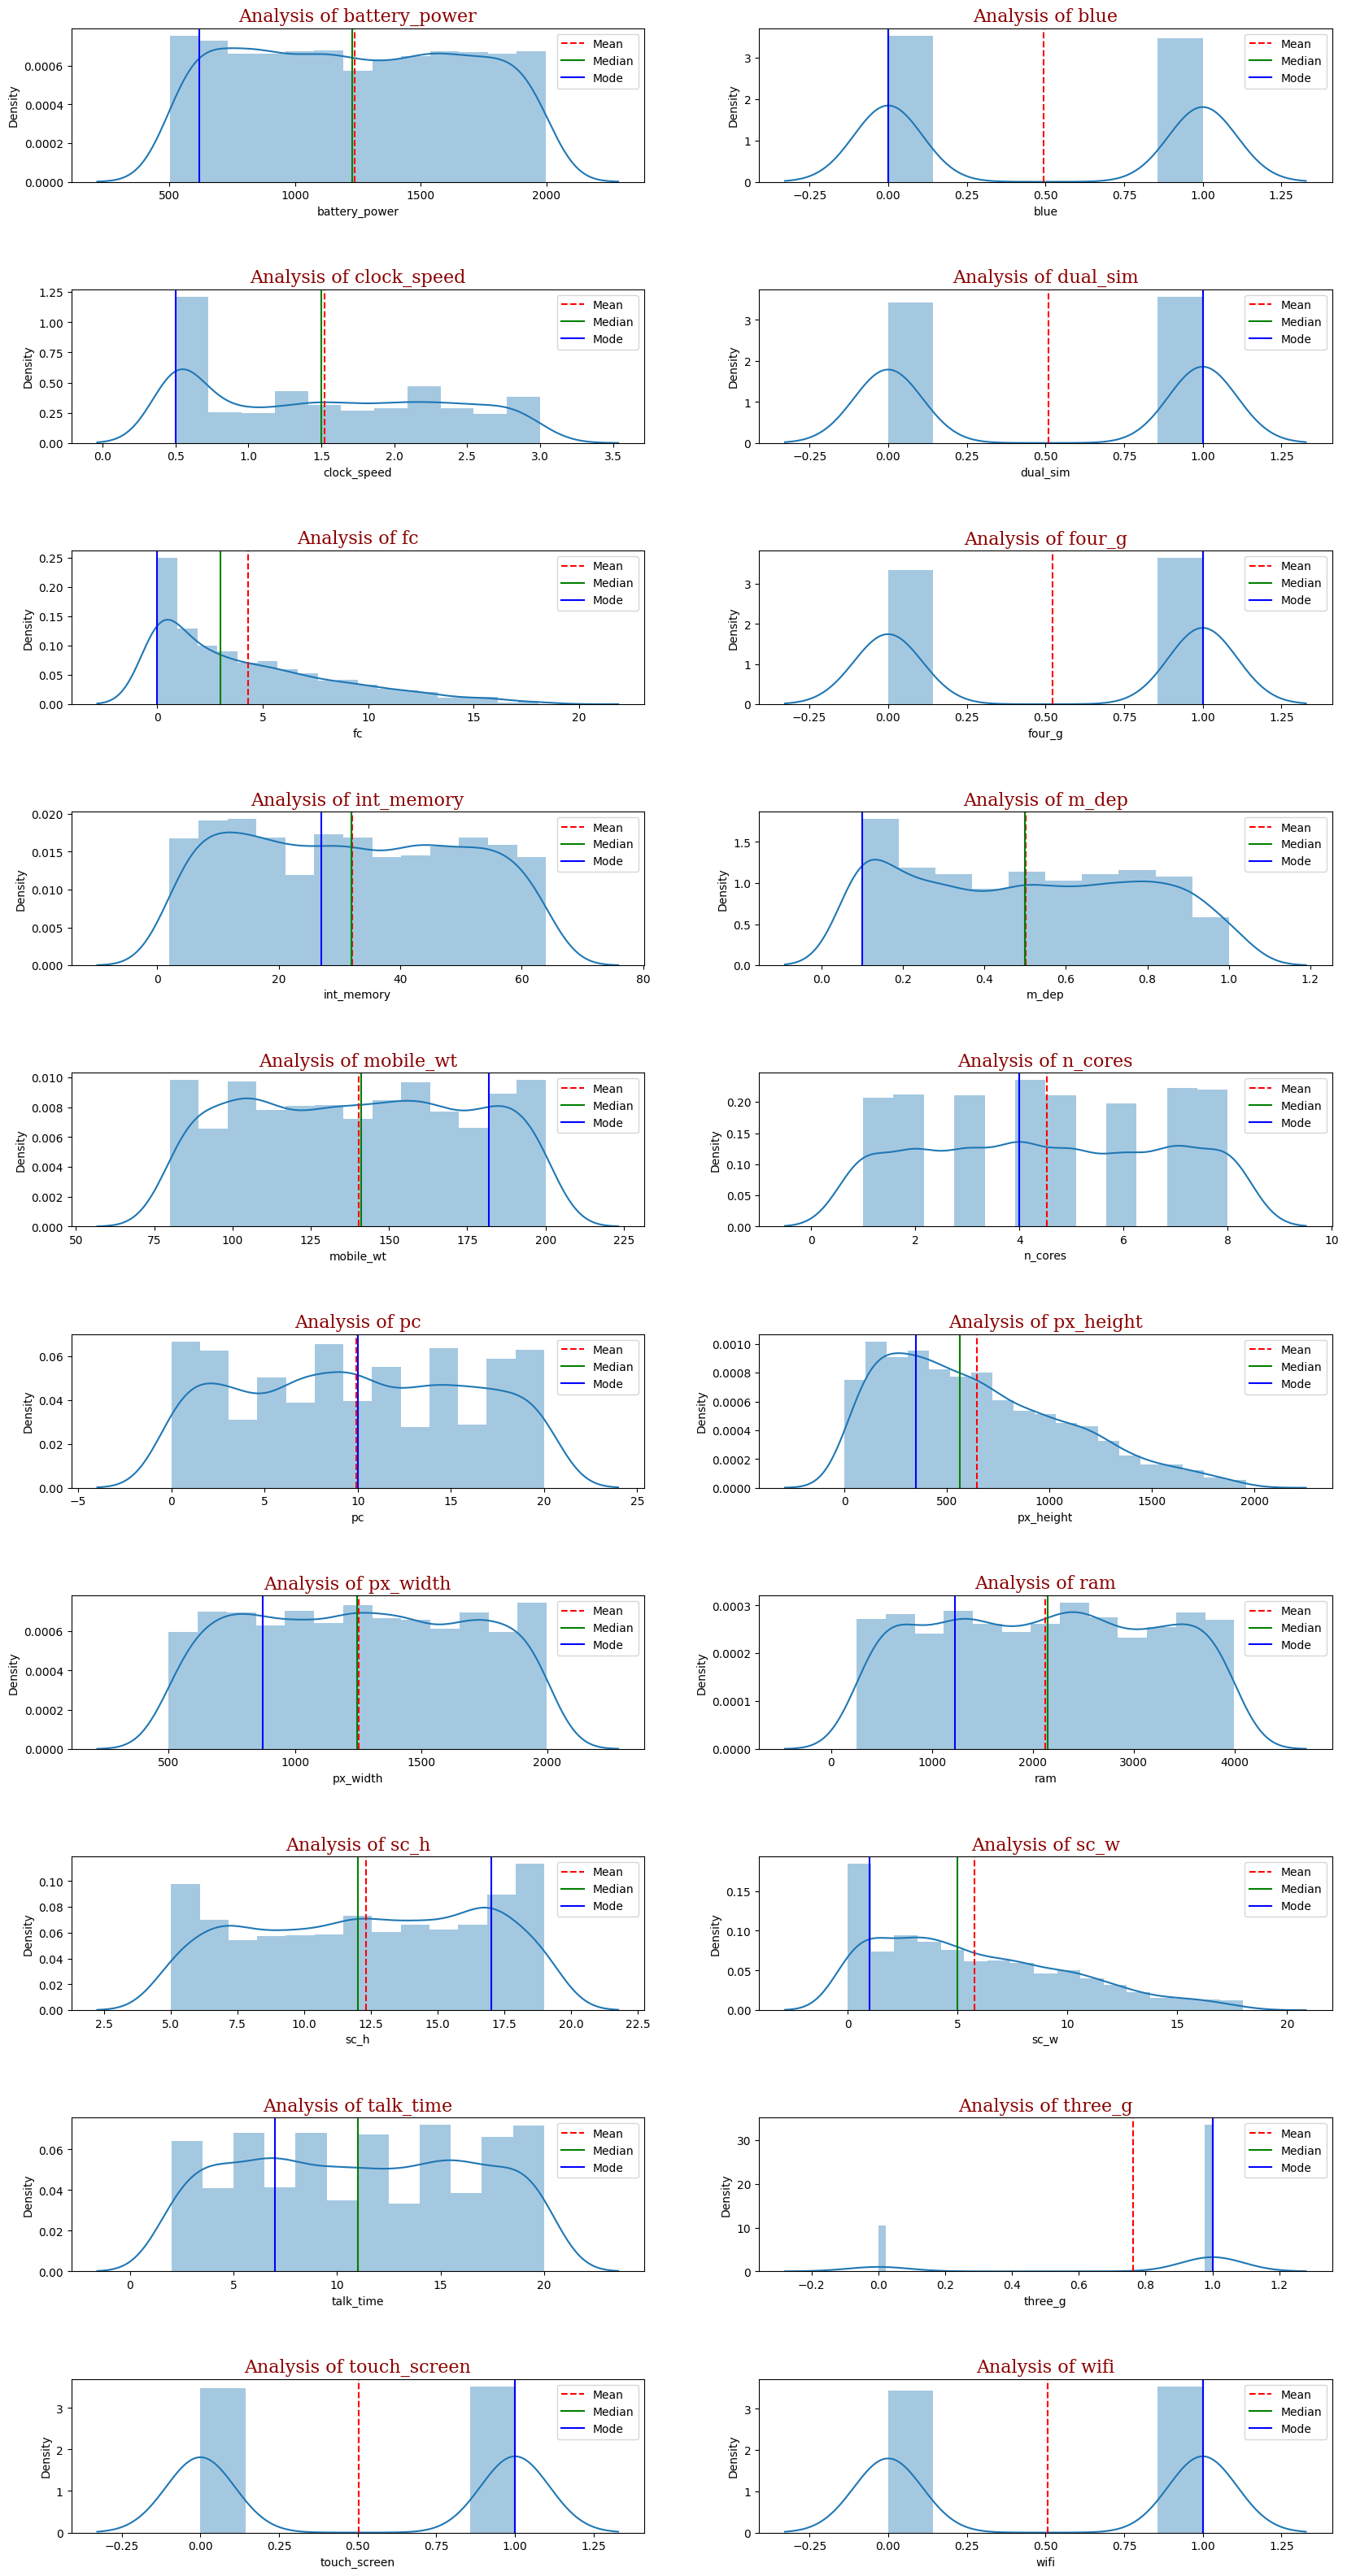

In [16]:
continuous_features = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range']

generate_distribution_plot(df, continuous_features)

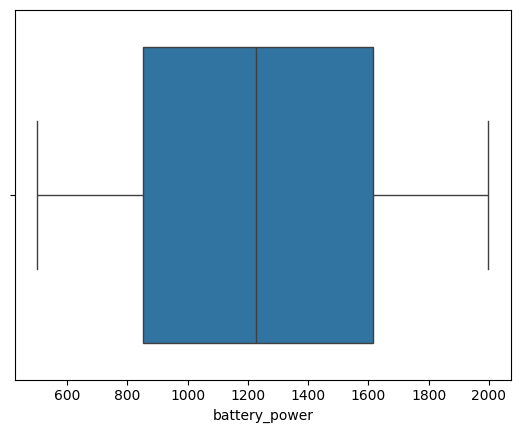

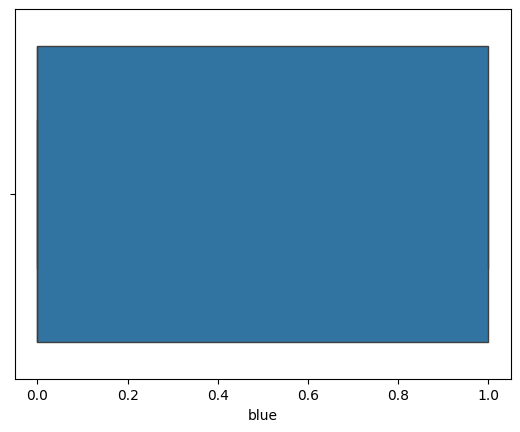

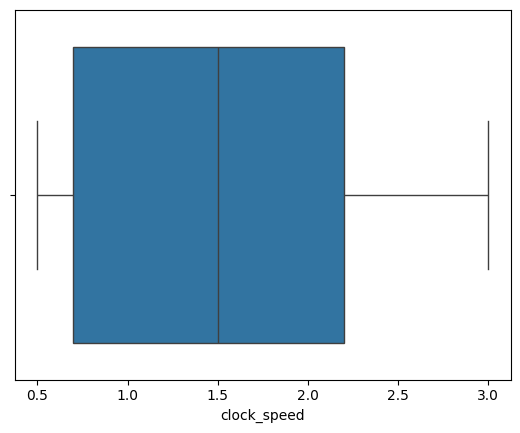

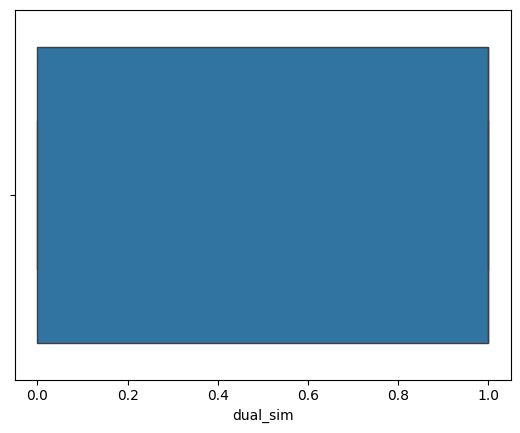

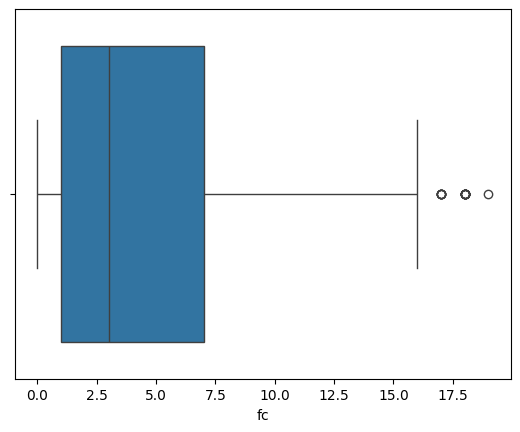

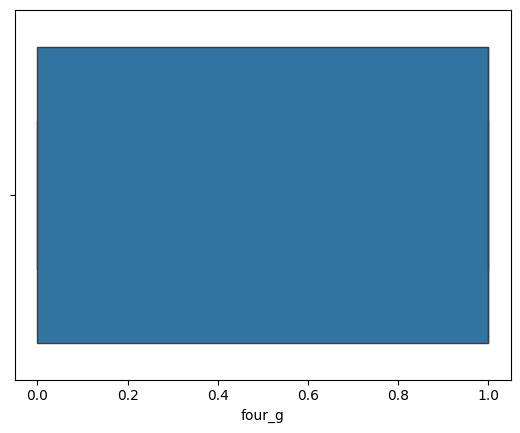

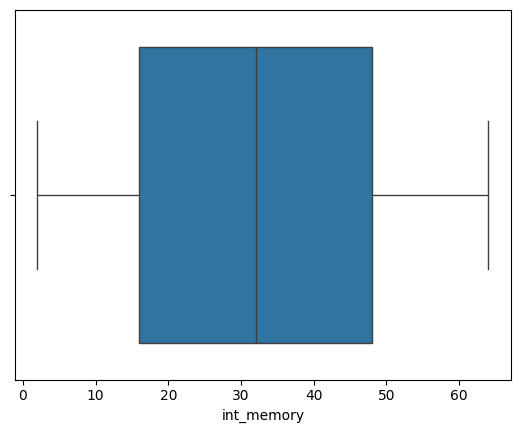

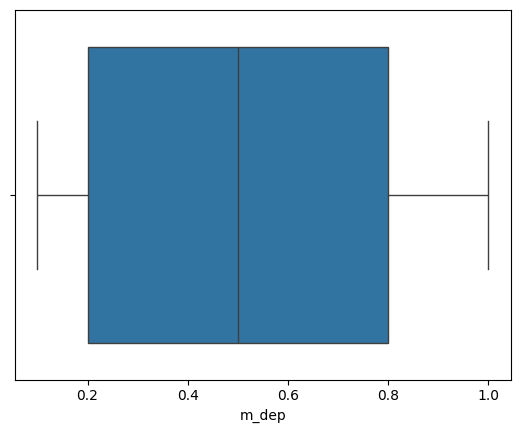

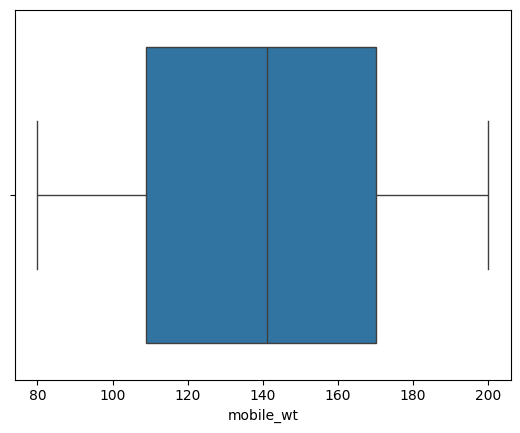

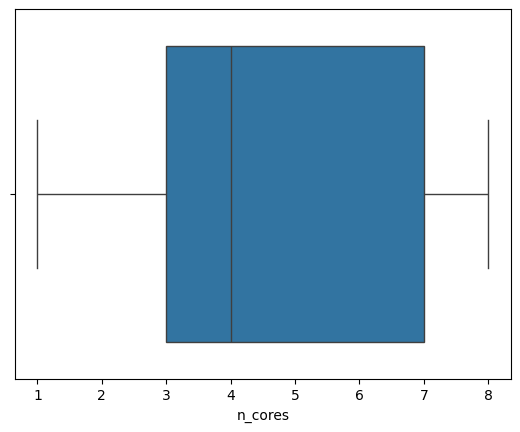

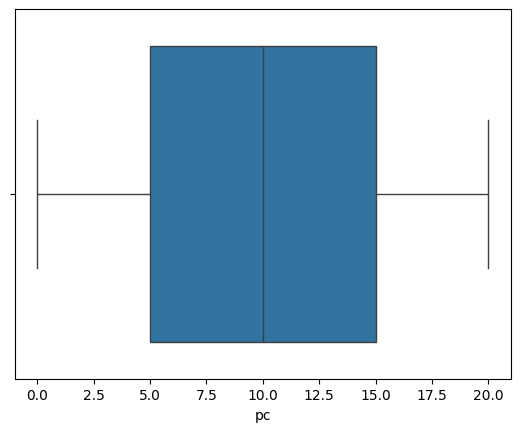

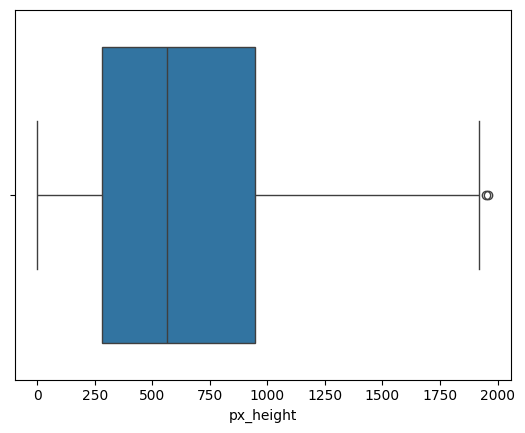

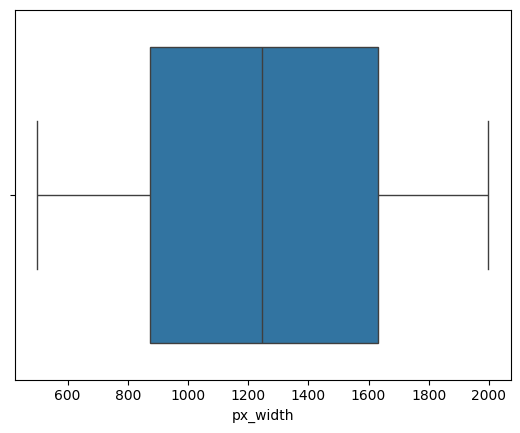

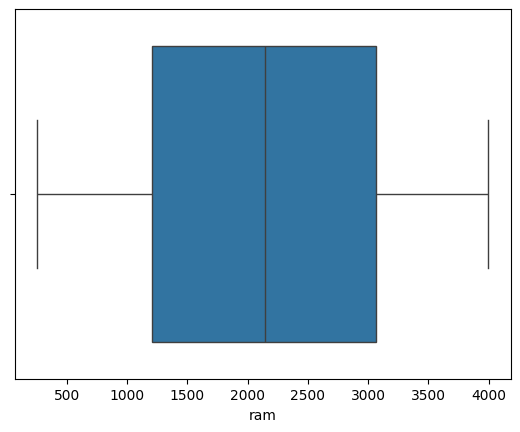

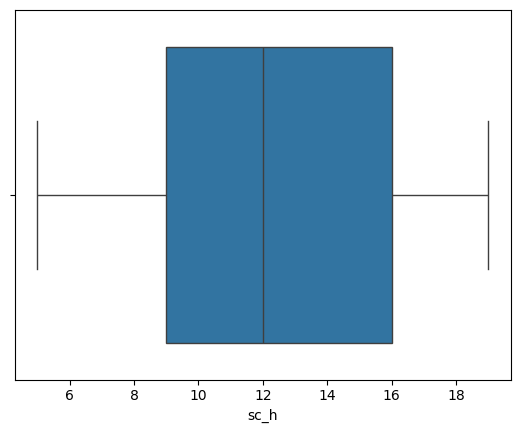

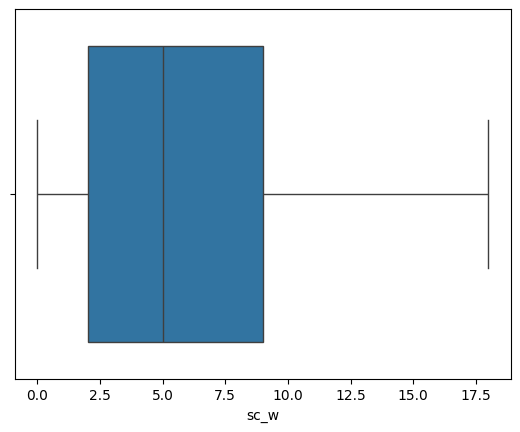

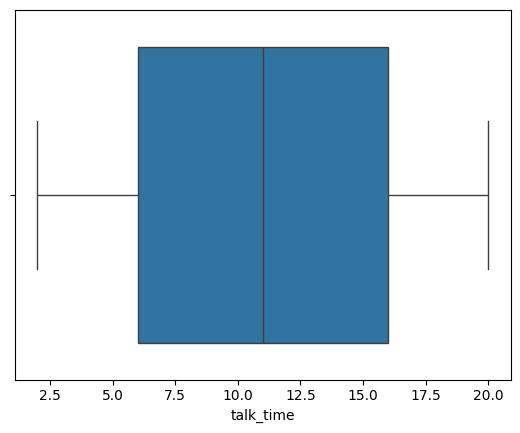

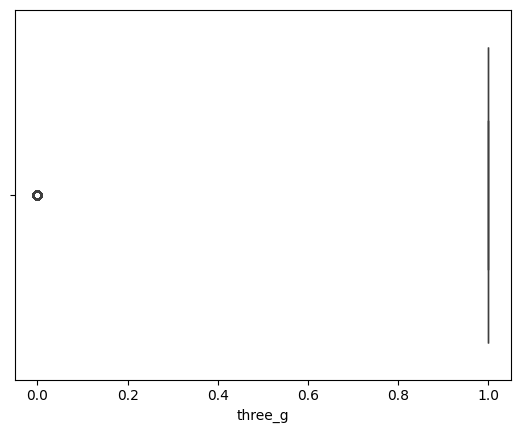

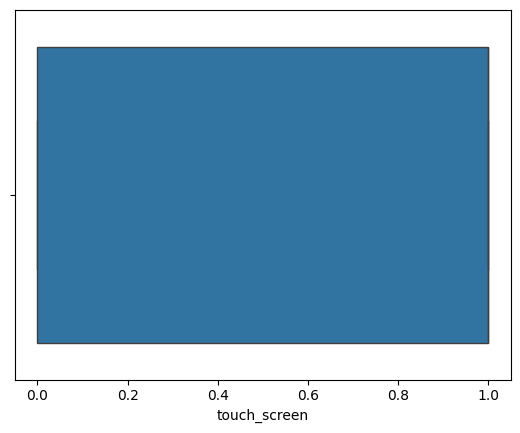

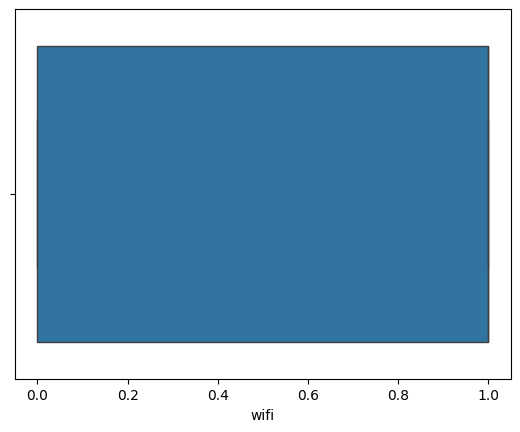

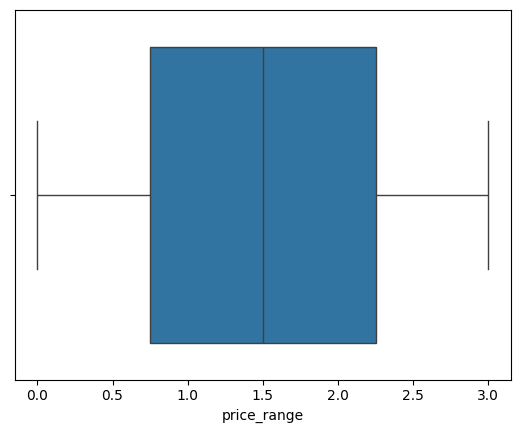

In [17]:
# Show boxplot for all columns
for i in df.columns:
    sns.boxplot(x= i, data=df)
    plt.show()


# 3. Препроцессинг

В датасете нет пропусков, поэтому пропустим этот этап предобработки

In [18]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Посмотрим на распределение целевой переменной. Каждый класс представлен одинаковым количеством сэмплов, поэтому under/over sampling не нужен.

In [19]:
df.price_range.value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

Разделим данные на трейн и валидацию:

In [20]:
X = df.drop('price_range', axis=1)
y = df['price_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Моделирование

Для подбора гиперпараметров будем использовать библиотеку optuna с байесовской оптимизацией.

В качестве бейзлайна будем смотреть качество на логистической регрессии.
Из постановки задачи нет явного предпочтения в сторону precision или recall, поэтому будем подбирать гиперпараметры на roc_auc, а смотреть итоговое качество на f1 с micro усреднением.

In [21]:
%pip install optuna

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import optuna


# Определение функции для оптимизации гиперпараметров
def optimize_logistic_regression(trial):
    # Гиперпараметры для оптимизации
    penalty = trial.suggest_categorical('penalty', ['l2', None])
    C = trial.suggest_loguniform('C', 1e-5, 1e5)
    max_iter = trial.suggest_int('max_iter', 100, 1000)

    # Создание модели логистической регрессии с оптимизированными гиперпараметрами
    model = LogisticRegression(penalty=penalty, C=C, max_iter=max_iter, random_state=42)

    # Обучение модели на обучающей выборке
    model.fit(X_train, y_train)

    # Предсказание на тестовой выборке
    y_pred = model.predict(X_test)

    # Вычисление метрики F1
    f1 = f1_score(y_test, y_pred, average='micro')

    return f1  # Optuna минимизирует функцию, поэтому используем отрицательное значение F1

# Оптимизация гиперпараметров с помощью Optuna
study = optuna.create_study(direction='maximize')
study.optimize(optimize_logistic_regression, n_trials=50)

# Получение лучших гиперпараметров
best_trial = study.best_trial
best_params = best_trial.params

# Создание модели логистической регрессии с лучшими гиперпараметрами
best_model = LogisticRegression(**best_params, random_state=42)

# Обучение модели на всей обучающей выборке
best_model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = best_model.predict(X_test)

# Вычисление метрики F1
f1 = f1_score(y_test, y_pred, average='macro')
print(f'Лучшие гиперпараметры: {best_params}')
print(f'F1 на тестовой выборке: {f1:.4f}')

[I 2024-10-02 19:36:04,072] A new study created in memory with name: no-name-1c33b4b2-3211-4d6a-ad7b-491e5fd33d28
[I 2024-10-02 19:36:04,280] Trial 0 finished with value: 0.6525 and parameters: {'penalty': 'l2', 'C': 0.0009014232366232743, 'max_iter': 294}. Best is trial 0 with value: 0.6525.
[I 2024-10-02 19:36:04,591] Trial 1 finished with value: 0.68 and parameters: {'penalty': None, 'C': 910.2966306758912, 'max_iter': 482}. Best is trial 1 with value: 0.68.
[I 2024-10-02 19:36:05,127] Trial 2 finished with value: 0.7325 and parameters: {'penalty': None, 'C': 0.014310361531915306, 'max_iter': 842}. Best is trial 2 with value: 0.7325.
[I 2024-10-02 19:36:05,444] Trial 3 finished with value: 0.6925 and parameters: {'penalty': 'l2', 'C': 1153.9667704340893, 'max_iter': 515}. Best is trial 2 with value: 0.7325.
[I 2024-10-02 19:36:05,868] Trial 4 finished with value: 0.7025 and parameters: {'penalty': 'l2', 'C': 30.731424950470178, 'max_iter': 726}. Best is trial 2 with value: 0.7325.
[

Лучшие гиперпараметры: {'penalty': None, 'C': 0.0010057530288909392, 'max_iter': 852}
F1 на тестовой выборке: 0.7291


In [27]:
# Вывод классификационной отчетности
print('Классификационная отчетность:')
print(classification_report(y_test, y_pred))

Классификационная отчетность:
              precision    recall  f1-score   support

           0       0.93      0.84      0.88       105
           1       0.64      0.68      0.66        91
           2       0.58      0.59      0.58        92
           3       0.78      0.80      0.79       112

    accuracy                           0.73       400
   macro avg       0.73      0.73      0.73       400
weighted avg       0.74      0.73      0.74       400



Мы получили бейзлайн. С ходу видно, что средний ценовой сегмент предсказывается хуже. Ожидаемо путаются классы 2 и 3. Потенциальной доработок является присваивание большего sample_weight сэмплам этого класса.

Теперь перейдем на более сильные модели, сразу попробуем бустинги

**CatBoost**

In [24]:
#%pip install catboost
from catboost import CatBoostClassifier

In [25]:
# Определение функции для оптимизации гиперпараметров
def optimize_catboost(trial):
    # Гиперпараметры для оптимизации
    iterations = trial.suggest_int('iterations', 100, 400)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
    depth = trial.suggest_int('depth', 1, 3)
    l2_leaf_reg = trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e5)

    # Создание модели CatBoostClassifier с оптимизированными гиперпараметрами
    model = CatBoostClassifier(
        iterations=iterations,
        learning_rate=learning_rate,
        depth=depth,
        l2_leaf_reg=l2_leaf_reg,
        random_state=42,
        verbose=0
    )

    # Обучение модели на обучающей выборке
    model.fit(X_train, y_train)

    # Предсказание на тестовой выборке
    y_pred = model.predict(X_test)

    # Вычисление метрики F1
    f1 = f1_score(y_test, y_pred, average='macro')

    return f1  # Optuna минимизирует функцию, поэтому используем отрицательное значение F1

# Оптимизация гиперпараметров с помощью Optuna
study = optuna.create_study(direction='maximize')
study.optimize(optimize_catboost, n_trials=50)

# Получение лучших гиперпараметров
best_trial = study.best_trial
best_params = best_trial.params

# Создание модели CatBoostClassifier с лучшими гиперпараметрами
best_model = CatBoostClassifier(**best_params, random_state=42)

# Обучение модели на всей обучающей выборке
best_model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = best_model.predict(X_test)

# Вычисление метрики F1
f1 = f1_score(y_test, y_pred, average='macro')

# Вывод классификационной отчетности
print('Классификационная отчетность:')
print(classification_report(y_test, y_pred))

print(f'Лучшие гиперпараметры: {best_params}')
print(f'F1 на тестовой выборке: {f1:.4f}')


[I 2024-10-02 19:35:10,520] A new study created in memory with name: no-name-bb3dee0d-0f9a-417b-97de-de8416ba36d9
[I 2024-10-02 19:35:11,426] Trial 0 finished with value: 0.5816102143333265 and parameters: {'iterations': 251, 'learning_rate': 1.1120162592834524e-05, 'depth': 1, 'l2_leaf_reg': 0.026352298727686078}. Best is trial 0 with value: 0.5816102143333265.
[I 2024-10-02 19:35:12,930] Trial 1 finished with value: 0.9287578922003067 and parameters: {'iterations': 376, 'learning_rate': 0.07114567438445103, 'depth': 2, 'l2_leaf_reg': 0.5071413492478495}. Best is trial 1 with value: 0.9287578922003067.
[I 2024-10-02 19:35:13,862] Trial 2 finished with value: 0.7507175136454073 and parameters: {'iterations': 217, 'learning_rate': 0.004907122525720391, 'depth': 1, 'l2_leaf_reg': 1.62916371437925e-05}. Best is trial 1 with value: 0.9287578922003067.
[I 2024-10-02 19:35:14,762] Trial 3 finished with value: 0.895139392495754 and parameters: {'iterations': 218, 'learning_rate': 0.0299204790

0:	learn: 1.2716217	total: 1.79ms	remaining: 618ms
1:	learn: 1.1667677	total: 3.8ms	remaining: 654ms
2:	learn: 1.0864194	total: 5.58ms	remaining: 638ms
3:	learn: 1.0173313	total: 8.63ms	remaining: 738ms
4:	learn: 0.9582356	total: 11.1ms	remaining: 760ms
5:	learn: 0.9084152	total: 15.2ms	remaining: 863ms
6:	learn: 0.8643485	total: 18.4ms	remaining: 893ms
7:	learn: 0.8252829	total: 22.8ms	remaining: 962ms
8:	learn: 0.7903029	total: 26.9ms	remaining: 1.01s
9:	learn: 0.7579077	total: 30.8ms	remaining: 1.03s
10:	learn: 0.7311419	total: 32.6ms	remaining: 992ms
11:	learn: 0.7086480	total: 34.4ms	remaining: 959ms
12:	learn: 0.6843317	total: 36.3ms	remaining: 929ms
13:	learn: 0.6638786	total: 38.2ms	remaining: 906ms
14:	learn: 0.6456679	total: 40ms	remaining: 882ms
15:	learn: 0.6267464	total: 41.7ms	remaining: 860ms
16:	learn: 0.6087065	total: 43.4ms	remaining: 840ms
17:	learn: 0.5920942	total: 45.4ms	remaining: 827ms
18:	learn: 0.5768743	total: 47ms	remaining: 808ms
19:	learn: 0.5641793	total:

**XGBoost**

In [28]:
#%pip install xgboost
import xgboost as xgb

In [29]:
def optimize_xgboost(trial):
    # Гиперпараметры для оптимизации
    max_depth = trial.suggest_int('max_depth', 3, 10)
    learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 1.0)
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    gamma = trial.suggest_loguniform('gamma', 0.01, 1.0)
    subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
    colsample_bytree = trial.suggest_uniform('colsample_bytree', 0.5, 1.0)
    reg_alpha = trial.suggest_loguniform('reg_alpha', 0.01, 1.0)
    reg_lambda = trial.suggest_loguniform('reg_lambda', 0.01, 1.0)

    # Создание модели XGBoost с оптимизированными гиперпараметрами
    model = xgb.XGBClassifier(max_depth=max_depth, learning_rate=learning_rate, n_estimators=n_estimators,
                              gamma=gamma, subsample=subsample, colsample_bytree=colsample_bytree,
                              reg_alpha=reg_alpha, reg_lambda=reg_lambda, random_state=42)

    # Обучение модели на обучающей выборке
    model.fit(X_train, y_train)

    # Предсказание на тестовой выборке
    y_pred = model.predict(X_test)

    # Вычисление метрики F1
    f1 = f1_score(y_test, y_pred, average='macro')

    return f1  # Optuna минимизирует функцию, поэтому используем отрицательное значение F1

# Оптимизация гиперпараметров с помощью Optuna
study = optuna.create_study(direction='maximize')
study.optimize(optimize_xgboost, n_trials=50)

# Получение лучших гиперпараметров
best_trial = study.best_trial
best_params = best_trial.params

# Создание модели XGBoost с лучшими гиперпараметрами
best_model = xgb.XGBClassifier(**best_params, random_state=42)

# Обучение модели на всей обучающей выборке
best_model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = best_model.predict(X_test)

# Вычисление метрики F1
f1 = f1_score(y_test, y_pred, average='macro')

# Вывод классификационной отчетности
print('Классификационная отчетность:')
print(classification_report(y_test, y_pred))

print(f'Лучшие гиперпараметры: {best_params}')
print(f'F1 на тестовой выборке: {f1:.4f}')

[I 2024-10-02 19:36:43,615] A new study created in memory with name: no-name-cd735570-55ec-46f9-bc60-726dc73dd527
[I 2024-10-02 19:36:52,454] Trial 0 finished with value: 0.8826415218656279 and parameters: {'max_depth': 8, 'learning_rate': 0.016084019435635664, 'n_estimators': 175, 'gamma': 0.6335189337523404, 'subsample': 0.5529693885606042, 'colsample_bytree': 0.8992525087736781, 'reg_alpha': 0.012768547642347678, 'reg_lambda': 0.5060332213458988}. Best is trial 0 with value: 0.8826415218656279.
[I 2024-10-02 19:36:54,633] Trial 1 finished with value: 0.8192006547637098 and parameters: {'max_depth': 3, 'learning_rate': 0.028596152898813305, 'n_estimators': 110, 'gamma': 0.029480866963637522, 'subsample': 0.8424736425542703, 'colsample_bytree': 0.6937337072293035, 'reg_alpha': 0.09800236320723353, 'reg_lambda': 0.03457176459765516}. Best is trial 0 with value: 0.8826415218656279.
[I 2024-10-02 19:36:56,355] Trial 2 finished with value: 0.8037762970317672 and parameters: {'max_depth': 

Классификационная отчетность:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       105
           1       0.88      0.96      0.92        91
           2       0.87      0.86      0.86        92
           3       0.94      0.90      0.92       112

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400

Лучшие гиперпараметры: {'max_depth': 5, 'learning_rate': 0.10451125733338738, 'n_estimators': 116, 'gamma': 0.3195797635978664, 'subsample': 0.9047097609482053, 'colsample_bytree': 0.776468478524004, 'reg_alpha': 0.1311276375449304, 'reg_lambda': 0.1425012126052765}
F1 на тестовой выборке: 0.9158


**LightGBM**

In [30]:
#%pip install lightgbm
import lightgbm as lgb

**NN**

In [51]:
import torch
import torch.nn as nn
import torch.optim as optim


# Определение функции для оптимизации гиперпараметров
def optimize_mlp(trial):
    # Гиперпараметры для оптимизации
    hidden_size = trial.suggest_categorical('hidden_size', [64, 128, 256])
    num_layers = trial.suggest_int('num_layers', 2, 3)
    dropout = trial.suggest_uniform('dropout', 0.0, 0.5)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
    batch_size = trial.suggest_categorical('batch_size', [32, 64, 128])

    # Создание модели MLP
    model = nn.Sequential(
        nn.Linear(X_train.shape[1], hidden_size),
        nn.ReLU(),
        nn.Dropout(dropout),
        *[nn.Sequential(nn.Linear(hidden_size, hidden_size), nn.ReLU(), nn.Dropout(dropout)) for _ in range(num_layers-1)],
        nn.Linear(hidden_size, 4)
    )

    # Определение функции потерь и оптимизатора
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Обучение модели
    losses = []
    f1_scores = []
    for epoch in range(100):
        model.train()
        total_loss = 0
        for i in range(0, len(X_train), batch_size):
            inputs = torch.tensor(X_train.iloc[i:i+batch_size].values, dtype=torch.float32)
            labels = torch.tensor(y_train.iloc[i:i+batch_size].values, dtype=torch.long)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        losses.append(total_loss / (i+1))

        model.eval()
        with torch.no_grad():
            inputs = torch.tensor(X_test.values, dtype=torch.float32)
            labels = torch.tensor(y_test.values, dtype=torch.long)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, dim=1)
            f1 = f1_score(labels, predicted, average='macro')
            f1_scores.append(f1)

    return f1_scores[-1]  # Optuna минимизирует функцию, поэтому используем отрицательное значение F1

# Оптимизация гиперпараметров с помощью Optuna
study = optuna.create_study(direction='maximize')
study.optimize(optimize_mlp, n_trials=30)

# Получение лучших гиперпараметров
best_trial = study.best_trial
best_params = best_trial.params


[I 2024-10-02 19:59:50,416] A new study created in memory with name: no-name-f8e54ddd-fd2d-4e66-bfb9-948e089b0956
[I 2024-10-02 20:00:15,057] Trial 0 finished with value: 0.3673755267613883 and parameters: {'hidden_size': 64, 'num_layers': 3, 'dropout': 0.19606105695475734, 'learning_rate': 0.019710205616898013, 'batch_size': 32}. Best is trial 0 with value: 0.3673755267613883.
[I 2024-10-02 20:01:02,492] Trial 1 finished with value: 0.483368208807376 and parameters: {'hidden_size': 256, 'num_layers': 3, 'dropout': 0.3643254063584923, 'learning_rate': 0.0056952982597635576, 'batch_size': 32}. Best is trial 1 with value: 0.483368208807376.
[I 2024-10-02 20:01:13,126] Trial 2 finished with value: 0.35194088443044835 and parameters: {'hidden_size': 64, 'num_layers': 2, 'dropout': 0.39630245976098716, 'learning_rate': 2.6127818623909636e-05, 'batch_size': 32}. Best is trial 1 with value: 0.483368208807376.
[I 2024-10-02 20:01:25,908] Trial 3 finished with value: 0.5423376698728694 and para

In [55]:
hidden_size = best_params["hidden_size"]
num_layers = best_params["num_layers"]
dropout = best_params["dropout"]
learning_rate = best_params["learning_rate"]
batch_size = best_params["batch_size"]

In [60]:
# Создание модели MLP
model = nn.Sequential(
    nn.Linear(X_train.shape[1], hidden_size),
    nn.ReLU(),
    nn.Dropout(dropout),
    *[nn.Sequential(nn.Linear(hidden_size, hidden_size), nn.ReLU(), nn.Dropout(dropout)) for _ in range(num_layers-1)],
    nn.Linear(hidden_size, 4)
)

# Определение функции потерь и оптимизатора
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Обучение модели
losses = []
f1_scores = []
for epoch in range(100):
    model.train()
    total_loss = 0
    for i in range(0, len(X_train), batch_size):
        inputs = torch.tensor(X_train.iloc[i:i+batch_size].values, dtype=torch.float32)
        labels = torch.tensor(y_train.iloc[i:i+batch_size].values, dtype=torch.long)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    losses.append(total_loss / (i+1))

    model.eval()
    with torch.no_grad():
        inputs = torch.tensor(X_test.values, dtype=torch.float32)
        labels = torch.tensor(y_test.values, dtype=torch.long)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, dim=1)
        f1 = f1_score(labels, predicted, average='macro')
        f1_scores.append(f1)


Классификационная отчетность:
              precision    recall  f1-score   support

           0       0.94      0.79      0.86       105
           1       0.66      0.79      0.72        91
           2       0.60      0.74      0.66        92
           3       0.91      0.73      0.81       112

    accuracy                           0.76       400
   macro avg       0.78      0.76      0.76       400
weighted avg       0.79      0.76      0.77       400



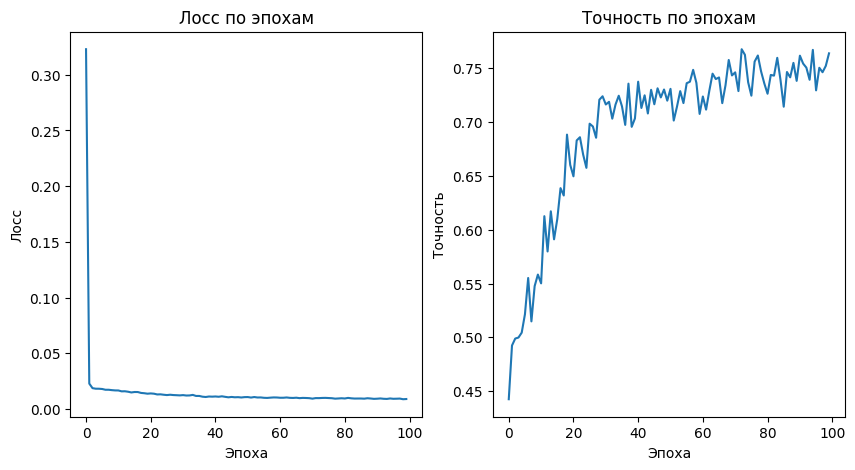

In [61]:
# Вывод классификационной отчетности
with torch.no_grad():
    outputs = model(torch.tensor(X_test.values, dtype=torch.float32))
    _, predicted = torch.max(outputs, dim=1)
    print('Классификационная отчетность:')
    print(classification_report(y_test, predicted))

# Вывод графика лосса и метрики по эпохам
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title('Лосс по эпохам')
plt.xlabel('Эпоха')
plt.ylabel('Лосс')

plt.subplot(1, 2, 2)
plt.plot(f1_scores)
plt.title('Точность по эпохам')
plt.xlabel('Эпоха')
plt.ylabel('Точность')

plt.show()

In [62]:
# Определение функции для оптимизации гиперпараметров
def optimize_lightgbm(trial):
    # Гиперпараметры для оптимизации
    num_leaves = trial.suggest_int('num_leaves', 31, 128)
    max_depth = trial.suggest_int('max_depth', 1, 3)
    learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 1.0)
    n_estimators = trial.suggest_int('n_estimators', 50, 500)
    colsample_bytree = trial.suggest_uniform('colsample_bytree', 0.5, 1.0)
    subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
    reg_alpha = trial.suggest_loguniform('reg_alpha', 0.01, 10.0)
    reg_lambda = trial.suggest_loguniform('reg_lambda', 0.01, 10.0)

    # Создание модели LightGBM с оптимизированными гиперпараметрами
    model = lgb.LGBMClassifier(num_leaves=num_leaves, max_depth=max_depth, learning_rate=learning_rate, n_estimators=n_estimators, colsample_bytree=colsample_bytree, subsample=subsample, reg_alpha=reg_alpha, reg_lambda=reg_lambda, random_state=42)

    # Обучение модели на обучающей выборке
    model.fit(X_train, y_train)

    # Предсказание на тестовой выборке
    y_pred = model.predict(X_test)

    # Вычисление метрики F1
    f1 = f1_score(y_test, y_pred, average='macro')

    return f1  # Optuna минимизирует функцию, поэтому используем отрицательное значение F1

# Оптимизация гиперпараметров с помощью Optuna
study = optuna.create_study(direction='maximize')
study.optimize(optimize_lightgbm, n_trials=50)

# Получение лучших гиперпараметров
best_trial = study.best_trial
best_params = best_trial.params

# Создание модели LightGBM с лучшими гиперпараметрами
best_model = lgb.LGBMClassifier(**best_params, random_state=42)

# Обучение модели на всей обучающей выборке
best_model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = best_model.predict(X_test)

# Вычисление метрики F1
f1 = f1_score(y_test, y_pred, average='macro')

# Вывод классификационной отчетности
print('Классификационная отчетность:')
print(classification_report(y_test, y_pred))

print(f'Лучшие гиперпараметры: {best_params}')
print(f'F1 на тестовой выборке: {f1:.4f}')


[I 2024-10-02 20:14:39,229] A new study created in memory with name: no-name-aa203d3f-7d3a-4693-aefc-ffb79594556d


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000675 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1361
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 20
[LightGBM] [Info] Start training from score -1.398873
[LightGBM] [Info] Start training from score -1.364044
[LightGBM] [Info] Start training from score -1.366492
[LightGBM] [Info] Start training from score -1.416754
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

[I 2024-10-02 20:14:40,127] Trial 0 finished with value: 0.9155893094831713 and parameters: {'num_leaves': 87, 'max_depth': 1, 'learning_rate': 0.1557936659472077, 'n_estimators': 325, 'colsample_bytree': 0.7221928601713596, 'subsample': 0.9150801042128383, 'reg_alpha': 0.02143029440416506, 'reg_lambda': 0.03257846537892783}. Best is trial 0 with value: 0.9155893094831713.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000684 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1361
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 20
[LightGBM] [Info] Start training from score -1.398873
[LightGBM] [Info] Start training from score -1.364044
[LightGBM] [Info] Start training from score -1.366492
[LightGBM] [Info] Start training from score -1.416754
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

[I 2024-10-02 20:14:40,941] Trial 1 finished with value: 0.8148674687374378 and parameters: {'num_leaves': 64, 'max_depth': 1, 'learning_rate': 0.03196188107844394, 'n_estimators': 255, 'colsample_bytree': 0.8908957338303767, 'subsample': 0.9893910634826268, 'reg_alpha': 0.02458241364030605, 'reg_lambda': 0.029370805523170333}. Best is trial 0 with value: 0.9155893094831713.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-10-02 20:14:41,806] Trial 2 finished with value: 0.9150290017928061 and parameters: {'num_leaves': 102, 'max_depth': 1, 'learning_rate': 0.3759915018019311, 'n_estimators': 312, 'colsample_bytree': 0.5517791384373097, 'subsample': 0.7899236376304417, 'reg_alpha': 1.9163030152952334, 'reg_lambda': 0.03153346377756671}. Best is trial 0 with value: 0.9155893094831713.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-10-02 20:14:42,924] Trial 3 finished with value: 0.9154863191748437 and parameters: {'num_leaves': 107, 'max_depth': 3, 'learning_rate': 0.1268639551166091, 'n_estimators': 339, 'colsample_bytree': 0.972868416374168, 'subsample': 0.5798229391181342, 'reg_alpha': 0.8308961249728142, 'reg_lambda': 6.475261145548095}. Best is trial 0 with value: 0.9155893094831713.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-10-02 20:14:44,274] Trial 4 finished with value: 0.8942033657744874 and parameters: {'num_leaves': 67, 'max_depth': 2, 'learning_rate': 0.03860095083330427, 'n_estimators': 442, 'colsample_bytree': 0.7458503728937385, 'subsample': 0.6581738780961383, 'reg_alpha': 0.05403403233355783, 'reg_lambda': 3.5143311659508703}. Best is trial 0 with value: 0.9155893094831713.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000453 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1361
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 20
[LightGBM] [Info] Start training from score -1.398873
[LightGBM] [Info] Start training from score -1.364044
[LightGBM] [Info] Start training from score -1.366492
[LightGBM] [Info] Start training from score -1.416754
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

[I 2024-10-02 20:14:44,846] Trial 5 finished with value: 0.9234164288512114 and parameters: {'num_leaves': 79, 'max_depth': 1, 'learning_rate': 0.2933247405980143, 'n_estimators': 200, 'colsample_bytree': 0.994351500454115, 'subsample': 0.7544657098186134, 'reg_alpha': 0.05241119020880343, 'reg_lambda': 0.44452656918188277}. Best is trial 5 with value: 0.9234164288512114.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-10-02 20:14:45,080] Trial 6 finished with value: 0.8743465690101441 and parameters: {'num_leaves': 51, 'max_depth': 2, 'learning_rate': 0.15021944072212864, 'n_estimators': 63, 'colsample_bytree': 0.7641635927313493, 'subsample': 0.9922856629866852, 'reg_alpha': 0.014547685633400302, 'reg_lambda': 0.01152806019601875}. Best is trial 5 with value: 0.9234164288512114.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-10-02 20:14:46,444] Trial 7 finished with value: 0.8951091642289042 and parameters: {'num_leaves': 120, 'max_depth': 3, 'learning_rate': 0.19228449831876632, 'n_estimators': 470, 'colsample_bytree': 0.7390172115416601, 'subsample': 0.9605817714966607, 'reg_alpha': 6.750786763120241, 'reg_lambda': 0.011890343986365987}. Best is trial 5 with value: 0.9234164288512114.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

[I 2024-10-02 20:14:47,153] Trial 8 finished with value: 0.866167071717907 and parameters: {'num_leaves': 114, 'max_depth': 1, 'learning_rate': 0.0669571446773545, 'n_estimators': 245, 'colsample_bytree': 0.7542607081541102, 'subsample': 0.5603928588831184, 'reg_alpha': 1.9239569164108001, 'reg_lambda': 0.16086740920359996}. Best is trial 5 with value: 0.9234164288512114.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-10-02 20:14:48,243] Trial 9 finished with value: 0.9381813470396106 and parameters: {'num_leaves': 122, 'max_depth': 1, 'learning_rate': 0.7644167588098295, 'n_estimators': 384, 'colsample_bytree': 0.9060138170896963, 'subsample': 0.8655518058455325, 'reg_alpha': 0.13859505725600688, 'reg_lambda': 0.1765643486572368}. Best is trial 9 with value: 0.9381813470396106.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-10-02 20:14:49,560] Trial 10 finished with value: 0.9383656496340314 and parameters: {'num_leaves': 128, 'max_depth': 2, 'learning_rate': 0.8157700556121704, 'n_estimators': 423, 'colsample_bytree': 0.8803367738919391, 'subsample': 0.8354130337709248, 'reg_alpha': 0.20452072694799844, 'reg_lambda': 0.7311096654796403}. Best is trial 10 with value: 0.9383656496340314.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000424 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1361
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 20
[LightGBM] [Info] Start training from score -1.398873
[LightGBM] [Info] Start training from score -1.364044
[LightGBM] [Info] Start training from score -1.366492
[LightGBM] [Info] Start training from score -1.416754
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

[I 2024-10-02 20:14:50,810] Trial 11 finished with value: 0.9128916139961021 and parameters: {'num_leaves': 128, 'max_depth': 2, 'learning_rate': 0.7867783941339488, 'n_estimators': 396, 'colsample_bytree': 0.8559336525087863, 'subsample': 0.8335557585686324, 'reg_alpha': 0.16503978231722394, 'reg_lambda': 0.6228936671813208}. Best is trial 10 with value: 0.9383656496340314.


[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

[I 2024-10-02 20:14:52,024] Trial 12 finished with value: 0.9154105094206852 and parameters: {'num_leaves': 97, 'max_depth': 2, 'learning_rate': 0.9444584407332162, 'n_estimators': 394, 'colsample_bytree': 0.885025603427505, 'subsample': 0.8502314300811822, 'reg_alpha': 0.19875516821791425, 'reg_lambda': 1.3224583713580176}. Best is trial 10 with value: 0.9383656496340314.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [W

[I 2024-10-02 20:14:54,602] Trial 13 finished with value: 0.9028625398653152 and parameters: {'num_leaves': 126, 'max_depth': 3, 'learning_rate': 0.015339009430944699, 'n_estimators': 498, 'colsample_bytree': 0.8647220562180088, 'subsample': 0.686048543323446, 'reg_alpha': 0.43231386902801655, 'reg_lambda': 0.15666017046406308}. Best is trial 10 with value: 0.9383656496340314.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000641 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1361
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 20
[LightGBM] [Info] Start training from score -1.398873
[LightGBM] [Info] Start training from score -1.364044
[LightGBM] [Info] Start training from score -1.366492
[LightGBM] [Info] Start training from score -1.416754
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

[I 2024-10-02 20:14:56,073] Trial 14 finished with value: 0.9278498879169963 and parameters: {'num_leaves': 34, 'max_depth': 2, 'learning_rate': 0.4882357187137877, 'n_estimators': 401, 'colsample_bytree': 0.9304551942416582, 'subsample': 0.8838166077899133, 'reg_alpha': 0.09825314809503627, 'reg_lambda': 0.1514836232119046}. Best is trial 10 with value: 0.9383656496340314.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000652 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1361
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 20
[LightGBM] [Info] Start training from score -1.398873
[LightGBM] [Info] Start training from score -1.364044
[LightGBM] [Info] Start training from score -1.366492
[LightGBM] [Info] Start training from score -1.416754
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

[I 2024-10-02 20:14:56,696] Trial 15 finished with value: 0.9204553790615564 and parameters: {'num_leaves': 113, 'max_depth': 1, 'learning_rate': 0.5435474516293524, 'n_estimators': 172, 'colsample_bytree': 0.8185011491939101, 'subsample': 0.8006275983922365, 'reg_alpha': 0.44691957026712864, 'reg_lambda': 1.9516592762851652}. Best is trial 10 with value: 0.9383656496340314.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000410 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1361
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 20
[LightGBM] [Info] Start training from score -1.398873
[LightGBM] [Info] Start training from score -1.364044
[LightGBM] [Info] Start training from score -1.366492
[LightGBM] [Info] Start training from score -1.416754
[LightGBM] [Warning] No further splits with po

[I 2024-10-02 20:14:58,134] Trial 16 finished with value: 0.9131988336581605 and parameters: {'num_leaves': 92, 'max_depth': 3, 'learning_rate': 0.29104439536457877, 'n_estimators': 432, 'colsample_bytree': 0.6550300921422876, 'subsample': 0.6907596341229055, 'reg_alpha': 0.08131650069740329, 'reg_lambda': 1.1533686733587813}. Best is trial 10 with value: 0.9383656496340314.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000144 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1361
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 20
[LightGBM] [Info] Start training from score -1.398873
[LightGBM] [Info] Start training from score -1.364044
[LightGBM] [Info] Start training from score -1.366492
[LightGBM] [Info] Start training from score -1.416754
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2024-10-02 20:14:59,292] Trial 17 finished with value: 0.9281789113794392 and parameters: {'num_leaves': 114, 'max_depth': 2, 'learning_rate': 0.9894906404004078, 'n_estimators': 364, 'colsample_bytree': 0.9475350023872532, 'subsample': 0.9150683801582012, 'reg_alpha': 1.134615074493346, 'reg_lambda': 0.07628549136072679}. Best is trial 10 with value: 0.9383656496340314.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

[I 2024-10-02 20:15:00,188] Trial 18 finished with value: 0.8890633259945135 and parameters: {'num_leaves': 79, 'max_depth': 1, 'learning_rate': 0.07372551356063184, 'n_estimators': 289, 'colsample_bytree': 0.8060703464066623, 'subsample': 0.5010632098679584, 'reg_alpha': 0.21914472439149585, 'reg_lambda': 0.32768222157485194}. Best is trial 10 with value: 0.9383656496340314.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-10-02 20:15:00,499] Trial 19 finished with value: 0.8848119033138196 and parameters: {'num_leaves': 105, 'max_depth': 2, 'learning_rate': 0.5929511642138331, 'n_estimators': 75, 'colsample_bytree': 0.6699290281218077, 'subsample': 0.7260194802389797, 'reg_alpha': 6.209419390047497, 'reg_lambda': 0.6113564596255625}. Best is trial 10 with value: 0.9383656496340314.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000114 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1361
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 20
[LightGBM] [Info] Start training from score -1.398873
[LightGBM] [Info] Start training from score -1.364044
[LightGBM] [Info] Start training from score -1.366492
[LightGBM] [Info] Start training from score -1.416754
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

[I 2024-10-02 20:15:01,840] Trial 20 finished with value: 0.9183175058059424 and parameters: {'num_leaves': 127, 'max_depth': 3, 'learning_rate': 0.25449166935674633, 'n_estimators': 363, 'colsample_bytree': 0.9273565204090124, 'subsample': 0.8621063863984597, 'reg_alpha': 0.038198074489966725, 'reg_lambda': 9.020643755550445}. Best is trial 10 with value: 0.9383656496340314.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000202 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1361
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 20
[LightGBM] [Info] Start training from score -1.398873
[LightGBM] [Info] Start training from score -1.364044
[LightGBM] [Info] Start training from score -1.366492
[LightGBM] [Info] Start training from score -1.416754
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2024-10-02 20:15:02,981] Trial 21 finished with value: 0.9130069400908543 and parameters: {'num_leaves': 114, 'max_depth': 2, 'learning_rate': 0.8878342188262246, 'n_estimators': 364, 'colsample_bytree': 0.9427437346884665, 'subsample': 0.9209139479203968, 'reg_alpha': 1.0176729380438359, 'reg_lambda': 0.0711452841117451}. Best is trial 10 with value: 0.9383656496340314.


[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

[I 2024-10-02 20:15:04,316] Trial 22 finished with value: 0.9327494852883914 and parameters: {'num_leaves': 119, 'max_depth': 2, 'learning_rate': 0.6061167195653594, 'n_estimators': 429, 'colsample_bytree': 0.8254064742529297, 'subsample': 0.9168227628509635, 'reg_alpha': 0.6730419462568943, 'reg_lambda': 0.07583393907531462}. Best is trial 10 with value: 0.9383656496340314.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training beca

[I 2024-10-02 20:15:05,696] Trial 23 finished with value: 0.9283728586765385 and parameters: {'num_leaves': 120, 'max_depth': 2, 'learning_rate': 0.44841722778215093, 'n_estimators': 443, 'colsample_bytree': 0.8249218307759844, 'subsample': 0.7957711582910002, 'reg_alpha': 0.3540536371033328, 'reg_lambda': 0.0807414145202695}. Best is trial 10 with value: 0.9383656496340314.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000150 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1361
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 20
[LightGBM] [Info] Start training from score -1.398873
[LightGBM] [Info] Start training from score -1.364044
[LightGBM] [Info] Start training from score -1.366492
[LightGBM] [Info] Start training from score -1.416754
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2024-10-02 20:15:07,012] Trial 24 finished with value: 0.9360081949281543 and parameters: {'num_leaves': 121, 'max_depth': 1, 'learning_rate': 0.5433244479475755, 'n_estimators': 430, 'colsample_bytree': 0.8972680643801164, 'subsample': 0.9477153746214497, 'reg_alpha': 0.0915401907769076, 'reg_lambda': 0.20618274979637202}. Best is trial 10 with value: 0.9383656496340314.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-10-02 20:15:08,434] Trial 25 finished with value: 0.9327490417138781 and parameters: {'num_leaves': 108, 'max_depth': 1, 'learning_rate': 0.359610290865139, 'n_estimators': 488, 'colsample_bytree': 0.9076777686974367, 'subsample': 0.9541849353310308, 'reg_alpha': 0.1400460153455996, 'reg_lambda': 0.21697443378399797}. Best is trial 10 with value: 0.9383656496340314.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000107 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1361
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 20
[LightGBM] [Info] Start training from score -1.398873
[LightGBM] [Info] Start training from score -1.364044
[LightGBM] [Info] Start training from score -1.366492
[LightGBM] [Info] Start training from score -1.416754
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2024-10-02 20:15:09,723] Trial 26 finished with value: 0.9335006933254026 and parameters: {'num_leaves': 99, 'max_depth': 1, 'learning_rate': 0.6737089393314116, 'n_estimators': 405, 'colsample_bytree': 0.5110381727012343, 'subsample': 0.8281820931568715, 'reg_alpha': 0.08654452864464023, 'reg_lambda': 0.7484319368109741}. Best is trial 10 with value: 0.9383656496340314.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000625 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1361
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 20
[LightGBM] [Info] Start training from score -1.398873
[LightGBM] [Info] Start training from score -1.364044
[LightGBM] [Info] Start training from score -1.366492
[LightGBM] [Info] Start training from score -1.416754
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

[I 2024-10-02 20:15:11,185] Trial 27 finished with value: 0.9327490417138781 and parameters: {'num_leaves': 122, 'max_depth': 1, 'learning_rate': 0.2434935742948312, 'n_estimators': 469, 'colsample_bytree': 0.8561653242513412, 'subsample': 0.8716577121147507, 'reg_alpha': 0.10709258246259248, 'reg_lambda': 0.2908977427181553}. Best is trial 10 with value: 0.9383656496340314.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000205 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1361
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 20
[LightGBM] [Info] Start training from score -1.398873
[LightGBM] [Info] Start training from score -1.364044
[LightGBM] [Info] Start training from score -1.366492
[LightGBM] [Info] Start training from score -1.416754
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2024-10-02 20:15:13,337] Trial 28 finished with value: 0.933048470941497 and parameters: {'num_leaves': 87, 'max_depth': 1, 'learning_rate': 0.3911947301872695, 'n_estimators': 461, 'colsample_bytree': 0.9993953606926763, 'subsample': 0.94817627079196, 'reg_alpha': 0.22650813610396572, 'reg_lambda': 2.6862822285170216}. Best is trial 10 with value: 0.9383656496340314.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000659 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1361
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 20
[LightGBM] [Info] Start training from score -1.398873
[LightGBM] [Info] Start training from score -1.364044
[LightGBM] [Info] Start training from score -1.366492
[LightGBM] [Info] Start training from score -1.416754
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

[I 2024-10-02 20:15:14,636] Trial 29 finished with value: 0.9335006933254026 and parameters: {'num_leaves': 88, 'max_depth': 1, 'learning_rate': 0.718622414785876, 'n_estimators': 325, 'colsample_bytree': 0.7870606810643207, 'subsample': 0.8907694718183238, 'reg_alpha': 0.010082389635118618, 'reg_lambda': 1.0338631537404637}. Best is trial 10 with value: 0.9383656496340314.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-10-02 20:15:15,500] Trial 30 finished with value: 0.9209571010610094 and parameters: {'num_leaves': 128, 'max_depth': 1, 'learning_rate': 0.19670634084648003, 'n_estimators': 289, 'colsample_bytree': 0.6861242381917554, 'subsample': 0.7372306129118682, 'reg_alpha': 0.037715596959685405, 'reg_lambda': 0.34753535117528317}. Best is trial 10 with value: 0.9383656496340314.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-10-02 20:15:16,747] Trial 31 finished with value: 0.9360081949281543 and parameters: {'num_leaves': 99, 'max_depth': 1, 'learning_rate': 0.6678769964341892, 'n_estimators': 414, 'colsample_bytree': 0.5047442372778237, 'subsample': 0.8188212863806255, 'reg_alpha': 0.07532554303360475, 'reg_lambda': 0.726093413725192}. Best is trial 10 with value: 0.9383656496340314.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-10-02 20:15:17,844] Trial 32 finished with value: 0.9359009811504808 and parameters: {'num_leaves': 110, 'max_depth': 1, 'learning_rate': 0.7050041209927496, 'n_estimators': 377, 'colsample_bytree': 0.5651153620119169, 'subsample': 0.8168320095139178, 'reg_alpha': 0.05904386367477766, 'reg_lambda': 0.12195223855486167}. Best is trial 10 with value: 0.9383656496340314.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-10-02 20:15:19,050] Trial 33 finished with value: 0.9408115956971509 and parameters: {'num_leaves': 119, 'max_depth': 1, 'learning_rate': 0.4784554570904893, 'n_estimators': 422, 'colsample_bytree': 0.6064087878411266, 'subsample': 0.7711071999344317, 'reg_alpha': 0.026550891114559737, 'reg_lambda': 0.4906445706866202}. Best is trial 33 with value: 0.9408115956971509.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000653 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1361
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 20
[LightGBM] [Info] Start training from score -1.398873
[LightGBM] [Info] Start training from score -1.364044
[LightGBM] [Info] Start training from score -1.366492
[LightGBM] [Info] Start training from score -1.416754
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

[I 2024-10-02 20:15:20,061] Trial 34 finished with value: 0.9383228799502383 and parameters: {'num_leaves': 120, 'max_depth': 1, 'learning_rate': 0.406868158899334, 'n_estimators': 339, 'colsample_bytree': 0.6250009798277292, 'subsample': 0.8873986462629819, 'reg_alpha': 0.02490144979872572, 'reg_lambda': 0.0463506435116301}. Best is trial 33 with value: 0.9408115956971509.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-10-02 20:15:21,082] Trial 35 finished with value: 0.938243713090263 and parameters: {'num_leaves': 118, 'max_depth': 1, 'learning_rate': 0.35147574380849955, 'n_estimators': 342, 'colsample_bytree': 0.6213967305883347, 'subsample': 0.7758635835560084, 'reg_alpha': 0.021426794801469754, 'reg_lambda': 0.04209149865320339}. Best is trial 33 with value: 0.9408115956971509.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-10-02 20:15:22,073] Trial 36 finished with value: 0.943345621773867 and parameters: {'num_leaves': 104, 'max_depth': 1, 'learning_rate': 0.3629253025996413, 'n_estimators': 340, 'colsample_bytree': 0.6167752861367943, 'subsample': 0.7639565330339579, 'reg_alpha': 0.021500720606997148, 'reg_lambda': 0.023851794114288637}. Best is trial 36 with value: 0.943345621773867.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000126 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1361
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 20
[LightGBM] [Info] Start training from score -1.398873
[LightGBM] [Info] Start training from score -1.364044
[LightGBM] [Info] Start training from score -1.366492
[LightGBM] [Info] Start training from score -1.416754
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2024-10-02 20:15:22,861] Trial 37 finished with value: 0.9004047233104233 and parameters: {'num_leaves': 105, 'max_depth': 1, 'learning_rate': 0.1319203035380616, 'n_estimators': 252, 'colsample_bytree': 0.6014023677679337, 'subsample': 0.7715501419690542, 'reg_alpha': 0.021397702087472614, 'reg_lambda': 0.01776580005069107}. Best is trial 36 with value: 0.943345621773867.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-10-02 20:15:23,926] Trial 38 finished with value: 0.9081574871994104 and parameters: {'num_leaves': 95, 'max_depth': 1, 'learning_rate': 0.10692033563833382, 'n_estimators': 309, 'colsample_bytree': 0.7015753862761677, 'subsample': 0.6265271414091711, 'reg_alpha': 0.028691062743474743, 'reg_lambda': 0.0209755679786925}. Best is trial 36 with value: 0.943345621773867.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000644 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1361
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 20
[LightGBM] [Info] Start training from score -1.398873
[LightGBM] [Info] Start training from score -1.364044
[LightGBM] [Info] Start training from score -1.366492
[LightGBM] [Info] Start training from score -1.416754
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

[I 2024-10-02 20:15:24,676] Trial 39 finished with value: 0.9184022220627512 and parameters: {'num_leaves': 57, 'max_depth': 2, 'learning_rate': 0.22081017377972234, 'n_estimators': 203, 'colsample_bytree': 0.6339636640659964, 'subsample': 0.7078964147760523, 'reg_alpha': 0.014540927081540655, 'reg_lambda': 0.04109228535680313}. Best is trial 36 with value: 0.943345621773867.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1361
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 20
[LightGBM] [Info] Start training from score -1.398873
[LightGBM] [Info] Start training from score -1.364044
[LightGBM] [Info] Start training from score -1.366492
[LightGBM] [Info] Start training from score -1.416754
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2024-10-02 20:15:25,876] Trial 40 finished with value: 0.9152921070953857 and parameters: {'num_leaves': 71, 'max_depth': 1, 'learning_rate': 0.16703564918560734, 'n_estimators': 343, 'colsample_bytree': 0.5787600363311264, 'subsample': 0.7602071278912526, 'reg_alpha': 0.013270651757825103, 'reg_lambda': 0.02178404847629564}. Best is trial 36 with value: 0.943345621773867.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000615 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1361
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 20
[LightGBM] [Info] Start training from score -1.398873
[LightGBM] [Info] Start training from score -1.364044
[LightGBM] [Info] Start training from score -1.366492
[LightGBM] [Info] Start training from score -1.416754
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

[I 2024-10-02 20:15:26,910] Trial 41 finished with value: 0.9355278949591745 and parameters: {'num_leaves': 117, 'max_depth': 1, 'learning_rate': 0.33498464753953777, 'n_estimators': 332, 'colsample_bytree': 0.6122548375367532, 'subsample': 0.7790864791074374, 'reg_alpha': 0.02362083130799489, 'reg_lambda': 0.04068006886668539}. Best is trial 36 with value: 0.943345621773867.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000641 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1361
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 20
[LightGBM] [Info] Start training from score -1.398873
[LightGBM] [Info] Start training from score -1.364044
[LightGBM] [Info] Start training from score -1.366492
[LightGBM] [Info] Start training from score -1.416754
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

[I 2024-10-02 20:15:27,994] Trial 42 finished with value: 0.9383228799502383 and parameters: {'num_leaves': 109, 'max_depth': 1, 'learning_rate': 0.42943445292262605, 'n_estimators': 347, 'colsample_bytree': 0.6331899783492624, 'subsample': 0.7503420061891847, 'reg_alpha': 0.01945746312662027, 'reg_lambda': 0.048445530376155}. Best is trial 36 with value: 0.943345621773867.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-10-02 20:15:28,895] Trial 43 finished with value: 0.9380212302494174 and parameters: {'num_leaves': 111, 'max_depth': 1, 'learning_rate': 0.42061008304549424, 'n_estimators': 302, 'colsample_bytree': 0.5391636528523782, 'subsample': 0.7436554912657597, 'reg_alpha': 0.04200262937570653, 'reg_lambda': 0.015669577907919445}. Best is trial 36 with value: 0.943345621773867.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000646 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1361
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 20
[LightGBM] [Info] Start training from score -1.398873
[LightGBM] [Info] Start training from score -1.364044
[LightGBM] [Info] Start training from score -1.366492
[LightGBM] [Info] Start training from score -1.416754
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

[I 2024-10-02 20:15:30,278] Trial 44 finished with value: 0.8583421777263364 and parameters: {'num_leaves': 103, 'max_depth': 1, 'learning_rate': 0.03492427901343244, 'n_estimators': 373, 'colsample_bytree': 0.7121267307449529, 'subsample': 0.6524743493470897, 'reg_alpha': 0.018767622185693427, 'reg_lambda': 0.029174822704222766}. Best is trial 36 with value: 0.943345621773867.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-10-02 20:15:31,073] Trial 45 finished with value: 0.7662941205405185 and parameters: {'num_leaves': 123, 'max_depth': 1, 'learning_rate': 0.01043410228570084, 'n_estimators': 261, 'colsample_bytree': 0.5926076192829658, 'subsample': 0.8375553573963342, 'reg_alpha': 0.030084404848496938, 'reg_lambda': 0.10590550464913075}. Best is trial 36 with value: 0.943345621773867.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-10-02 20:15:32,263] Trial 46 finished with value: 0.9236944715783754 and parameters: {'num_leaves': 109, 'max_depth': 3, 'learning_rate': 0.4498338549609379, 'n_estimators': 352, 'colsample_bytree': 0.6437604116489029, 'subsample': 0.7084926481813759, 'reg_alpha': 0.010039444069132517, 'reg_lambda': 0.05921450352482272}. Best is trial 36 with value: 0.943345621773867.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000122 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1361
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 20
[LightGBM] [Info] Start training from score -1.398873
[LightGBM] [Info] Start training from score -1.364044
[LightGBM] [Info] Start training from score -1.366492
[LightGBM] [Info] Start training from score -1.416754
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2024-10-02 20:15:33,580] Trial 47 finished with value: 0.9380212302494174 and parameters: {'num_leaves': 116, 'max_depth': 1, 'learning_rate': 0.29490910114544533, 'n_estimators': 452, 'colsample_bytree': 0.5293474697750261, 'subsample': 0.8035062273107827, 'reg_alpha': 0.057496551921922094, 'reg_lambda': 0.010292836180883499}. Best is trial 36 with value: 0.943345621773867.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-10-02 20:15:34,790] Trial 48 finished with value: 0.8817531323332063 and parameters: {'num_leaves': 125, 'max_depth': 1, 'learning_rate': 0.045736754394802674, 'n_estimators': 413, 'colsample_bytree': 0.7361084157647193, 'subsample': 0.8449443048593933, 'reg_alpha': 0.01650114840014434, 'reg_lambda': 0.46928417514857673}. Best is trial 36 with value: 0.943345621773867.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000664 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1361
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 20
[LightGBM] [Info] Start training from score -1.398873
[LightGBM] [Info] Start training from score -1.364044
[LightGBM] [Info] Start training from score -1.366492
[LightGBM] [Info] Start training from score -1.416754
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

[I 2024-10-02 20:15:35,501] Trial 49 finished with value: 0.8998350070518578 and parameters: {'num_leaves': 34, 'max_depth': 2, 'learning_rate': 0.48586948485348364, 'n_estimators': 224, 'colsample_bytree': 0.6788811266700892, 'subsample': 0.6617116011992678, 'reg_alpha': 3.1868932157968763, 'reg_lambda': 1.8063409651321543}. Best is trial 36 with value: 0.943345621773867.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

Лучшее качество показала модель LightGBM

# 5. Аналитика по лучшей модели

In [ ]:
# %pip install shap

 95%|=================== | 1514/1600 [00:17<00:00]       

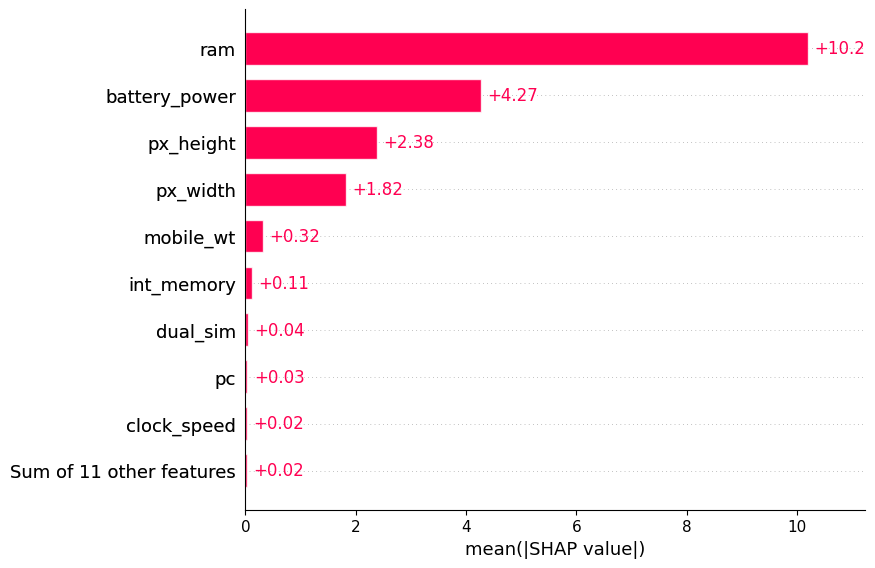

In [79]:
import shap

# Создание SHAP explainer
explainer = shap.Explainer(best_model, X_train)

# Вычисление SHAP значений для тестовой выборки
shap_values = explainer(X_test)
#shap_values = np.mean(np.array(shap_values), axis=0)
shap_values_0 = shap_values[:, :, 0]

# Создание SHAP beeswarm plot
shap.plots.bar(shap_values_0)


# 6. Подготовка к деплою

Сохранение лучшей модели

In [87]:
best_model.booster_.save_model("model.txt")

In [105]:
from collections import OrderedDict
import pandas as pd
import lightgbm as lgb


def predict(data: OrderedDict):
  '''
  Args:
    data - словарь, с ключами в таком порядке:
      'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep',
      'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time',
      'three_g', 'touch_screen', 'wifi'
    Returns:
      Значение предсказанного класса (от 0 до 3)
    '''

  # Загрузка сохраненной модели
  data = {k: [v] for k, v in data.items()}
  loaded_model = lgb.Booster(model_file='model.txt')
  y_pred = loaded_model.predict(pd.DataFrame(data))
  return y_pred.argmax()

In [106]:
predict({
    'battery_power': 1646.0,
    'blue': 0.0,
    'clock_speed': 2.5,
    'dual_sim': 0.0,
    'fc': 3.0,
    'four_g': 1.0,
    'int_memory': 25.0,
    'm_dep': 0.6,
    'mobile_wt': 200.0,
    'n_cores': 2.0,
    'pc': 5.0,
    'px_height': 211.0,
    'px_width': 1608.0,
    'ram': 686.0,
    'sc_h': 8.0,
    'sc_w': 6.0,
    'talk_time': 11.0,
    'three_g': 1.0,
    'touch_screen': 1.0,
    'wifi': 0.0,
    }
)

0